In [199]:
import pandas as pd
import activitiesdf
import importlib
import regions as reg
import matplotlib.pyplot as plt
import twitterusers
importlib.reload(twitterusers)

<module 'twitterusers' from '/Users/kristofferek/Documents/git/mscthesis/src/py/twitterusers.py'>

In [147]:
tweets_raw = twitterusers.tweets_from_sqlite('sweden.sqlite3')
tweets_raw.head()

,tweetid,userid,createdat,latitude,longitude,month,weekday,hourofday,timezone
0,588473411426332672,3271,2015-04-15 22:46:09+00:00,41.646619,-83.539017,4,3,18,America/New_York
1,588693100656087041,3271,2015-04-16 13:19:07+00:00,41.647568,-83.541159,4,4,9,America/New_York
2,589294841185443840,3271,2015-04-18 05:10:13+00:00,37.773198,-122.447951,4,5,22,America/Los_Angeles
3,589295803346235392,3271,2015-04-18 05:14:02+00:00,37.773229,-122.447904,4,5,22,America/Los_Angeles
4,589865306597634050,3271,2015-04-19 18:57:02+00:00,37.773205,-122.447878,4,0,11,America/Los_Angeles


In [152]:
tweets = twitterusers.cluster(tweets_raw)
tweets.head()

,tweetid,userid,createdat,latitude,longitude,month,weekday,hourofday,timezone,region
0,588473411426332672,3271,2015-04-15 22:46:09+00:00,41.646619,-83.539017,4,3,18,America/New_York,0
1,588693100656087041,3271,2015-04-16 13:19:07+00:00,41.647568,-83.541159,4,4,9,America/New_York,1
2,589294841185443840,3271,2015-04-18 05:10:13+00:00,37.773198,-122.447951,4,5,22,America/Los_Angeles,2
3,589295803346235392,3271,2015-04-18 05:14:02+00:00,37.773229,-122.447904,4,5,22,America/Los_Angeles,2
4,589865306597634050,3271,2015-04-19 18:57:02+00:00,37.773205,-122.447878,4,0,11,America/Los_Angeles,2


In [200]:
home_locations, tweets_w_home = twitterusers.get_home_locations(tweets)
home_locations.head()

copying
reindex
largest cluster
set values


,userid,region,tweetid,index,createdat,latitude,longitude,month,weekday,hourofday,timezone,label,geometry
0,3271,2,589294841185443840,2,2015-04-18 05:10:13+00:00,37.773198,-122.447951,4,5,22,America/Los_Angeles,home,POINT (-122.44795 37.77320)
1,5047,5,809515527672569857,16,2016-12-15 21:48:36+00:00,59.314920,18.019890,12,4,22,Europe/Stockholm,home,POINT (18.01989 59.31492)
2,5616,6,311021173670555648,32,2013-03-11 07:50:00+00:00,59.405498,17.954750,3,1,8,Europe/Stockholm,home,POINT (17.95475 59.40550)
3,5976,11,602384663596830720,2208,2015-05-24 08:04:30+00:00,56.053940,12.684570,5,0,10,Europe/Stockholm,home,POINT (12.68457 56.05394)
4,6657,8,1098823975833601,2503,2010-11-07 02:29:14+00:00,38.917100,-77.041000,11,6,22,America/New_York,home,POINT (-77.04100 38.91710)


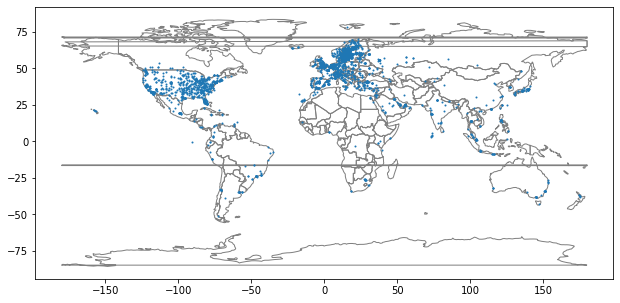

In [170]:
f, a = plt.subplots(figsize=(15,5))
reg.countries.to_crs(home_locations.crs).plot(ax=a, facecolor='none', edgecolor='grey')
home_locations.plot(ax=a, markersize=1)

In [160]:
swedish_users = twitterusers.get_user_from_region(home_locations, 'Sweden')
swedish_users

Int64Index([              5047,               5616,               8981,
                         32213,             392123,             528893,
                        578073,             618063,             625323,
                        633523,
            ...
            780635337965961216, 782260642770288640, 782909883637174273,
            785915409715302400, 787921786927276032, 789737143312740352,
            790301765744951296, 794973407964229636, 797211605494824960,
            806822309478727680],
           dtype='int64', name='userid', length=4733)

In [210]:
swedish_tweets = tweets_w_home.loc[swedish_users]
swedish_tweets

index  \
userid             region tweetid                       
5047               0      808309175377858563       11   
                   1      808365489361711104       12   
                   2      808592097418891264       13   
                   3      809321986103136256       14   
                          809746715221823488       17   
...                                               ...   
806822309478727680 7      815619064613609472  2936766   
                          815835652486938624  2936767   
                          815937364736380928  2936768   
                   8      816003760006668288  2936769   
                   9      817472176437608448  2936775   

                                                             createdat  \
userid             region tweetid                                        
5047               0      808309175377858563 2016-12-12 13:54:59+00:00   
                   1      808365489361711104 2016-12-12 17:38:46+00:00   
                   2      808592097418891264 2016-12-13 08:39:13+00:00   
                   3      809321986103136256 2016-12-15 08:59:32+00:00   
                          809746715221823488 2016-12-16 13:07:15+00:00   
...                                                                ...   
806822309478727680 7      815619064613609472 2017-01-01 18:01:53+00:00   
                          815835652486938624 2017-01-02 08:22:31+00:00   
                          815937364736380928 2017-01-02 15:06:41+00:00   
                   8      816003760006668288 2017-01-02 19:30:31+00:00   
                   9      817472176437608448 2017-01-06 20:45:29+00:00   

                                               latitude  longitude  month  \
userid             region tweetid                                           
5047               0      808309175377858563  59.337580  18.061930     12   
                   1      808365489361711104  59.341974  18.063797     12   
                   2      808592097418891264  59.332487  18.066684     12   
                   3      809321986103136256  59.350000  18.066700     12   
                          809746715221823488  59.350000  18.066700     12   
...                                                 ...        ...    ...   
806822309478727680 7      815619064613609472  57.716700  12.916700      1   
                          815835652486938624  57.716700  12.916700      1   
                          815937364736380928  57.716700  12.916700      1   
                   8      816003760006668288  57.730060  12.942200      1   
                   9      817472176437608448  56.675600  12.854990      1   

                                              weekday  hourofday  \
userid             region tweetid                                  
5047               0      808309175377858563        1         14   
                   1      808365489361711104        1         18   
                   2      808592097418891264        2          9   
                   3      809321986103136256        4          9   
                          809746715221823488        5         14   
...                                               ...        ...   
806822309478727680 7      815619064613609472        0         19   
                          815835652486938624        1          9   
                          815937364736380928        1         16   
                   8      816003760006668288        1         20   
                   9      817472176437608448        5         21   

                                                      timezone  label  
userid             region tweetid                                      
5047               0      808309175377858563  Europe/Stockholm  other  
                   1      808365489361711104  Europe/Stockholm  other  
                   2      808592097418891264  Europe/Stockholm  other  
                   3      809321986103136256  Europe/Stockholm  other  
                        

In [211]:
swedish_tws = swedish_tweets.drop('index', axis=1)
swedish_tws

createdat  \
userid             region tweetid                                        
5047               0      808309175377858563 2016-12-12 13:54:59+00:00   
                   1      808365489361711104 2016-12-12 17:38:46+00:00   
                   2      808592097418891264 2016-12-13 08:39:13+00:00   
                   3      809321986103136256 2016-12-15 08:59:32+00:00   
                          809746715221823488 2016-12-16 13:07:15+00:00   
...                                                                ...   
806822309478727680 7      815619064613609472 2017-01-01 18:01:53+00:00   
                          815835652486938624 2017-01-02 08:22:31+00:00   
                          815937364736380928 2017-01-02 15:06:41+00:00   
                   8      816003760006668288 2017-01-02 19:30:31+00:00   
                   9      817472176437608448 2017-01-06 20:45:29+00:00   

                                               latitude  longitude  month  \
userid             region tweetid                                           
5047               0      808309175377858563  59.337580  18.061930     12   
                   1      808365489361711104  59.341974  18.063797     12   
                   2      808592097418891264  59.332487  18.066684     12   
                   3      809321986103136256  59.350000  18.066700     12   
                          809746715221823488  59.350000  18.066700     12   
...                                                 ...        ...    ...   
806822309478727680 7      815619064613609472  57.716700  12.916700      1   
                          815835652486938624  57.716700  12.916700      1   
                          815937364736380928  57.716700  12.916700      1   
                   8      816003760006668288  57.730060  12.942200      1   
                   9      817472176437608448  56.675600  12.854990      1   

                                              weekday  hourofday  \
userid             region tweetid                                  
5047               0      808309175377858563        1         14   
                   1      808365489361711104        1         18   
                   2      808592097418891264        2          9   
                   3      809321986103136256        4          9   
                          809746715221823488        5         14   
...                                               ...        ...   
806822309478727680 7      815619064613609472        0         19   
                          815835652486938624        1          9   
                          815937364736380928        1         16   
                   8      816003760006668288        1         20   
                   9      817472176437608448        5         21   

                                                      timezone  label  
userid             region tweetid                                      
5047               0      808309175377858563  Europe/Stockholm  other  
                   1      808365489361711104  Europe/Stockholm  other  
                   2      808592097418891264  Europe/Stockholm  other  
                   3      809321986103136256  Europe/Stockholm  other  
                          809746715221823488  Europe/Stockholm  other  
...                                                        ...    ...  
806822309478727680 7      815619064613609472  Europe/Stockholm  other  
                          815835652486938624  Europe/Stockholm  other  
                          815937364736380928  Europe/Stockholm  other  
                   8      816003760006668288  Europe/Stockholm  other  
                   9      817472176437608448  Europe/Stockholm  other  

[1490246 rows x 8 columns]

In [217]:
swedish_tws.loc[85666280]

createdat   latitude  longitude  \
region tweetid                                                               
0      191185472427536385  2012-04-14 15:25:43+00:00  43.610438   3.874429   
       193104257946357761  2012-04-19 22:30:17+00:00  43.607900   3.875913   
       198790596817719296  2012-05-05 15:05:46+00:00  43.607900   3.875913   
       200226425461161984  2012-05-09 14:11:14+00:00  43.607900   3.875913   
       200244020172173312  2012-05-09 15:21:09+00:00  43.607900   3.875913   
...                                              ...        ...        ...   
398    1042767225545846789 2018-09-20 13:27:34+00:00  59.336630  18.058230   
399    1047078357823905792 2018-10-02 10:58:28+00:00  55.480167  13.069139   
400    1048971797608194048 2018-10-07 16:22:20+00:00  56.033422  13.149482   
401    1081898009103863808 2019-01-06 12:59:20+00:00  59.167453  17.666623   
402    1096179983108599809 2019-02-14 22:50:48+00:00  55.677630  12.494890   

                            month  weekday  hourofday           timezone  \
region tweetid                                                             
0      191185472427536385       4        6         17       Europe/Paris   
       193104257946357761       4        5          0       Europe/Paris   
       198790596817719296       5        6         17       Europe/Paris   
       200226425461161984       5        3         16       Europe/Paris   
       200244020172173312       5        3         17       Europe/Paris   
...                           ...      ...        ...                ...   
398    1042767225545846789      9        4         15   Europe/Stockholm   
399    1047078357823905792     10        2         12   Europe/Stockholm   
400    1048971797608194048     10        0         18   Europe/Stockholm   
401    1081898009103863808      1        0         13   Europe/Stockholm   
402    1096179983108599809      2        4         23  Europe/Copenhagen   

                            label  
region tweetid                     
0      191185472427536385   other  
       193104257946357761   other  
       198790596817719296   other  
       200226425461161984   other  
       200244020172173312   other  
...                           ...  
398    1042767225545846789  other  
399    1047078357823905792  other  
400    1048971797608194048  other  
401    1081898009103863808  other  
402    1096179983108599809  other  

[2189 rows x 8 columns]

In [225]:
def filter_tweets_before_home(df):
    home_start = df[df['label'] == 'home']['createdat'].min()
    return df[df['createdat'] > home_start]

In [230]:
filtered_tweets = swedish_tws.groupby(level=0).apply(filter_tweets_before_home).droplevel(level=0)
filtered_tweets

createdat  \
userid             region tweetid                                        
5047               3      809746715221823488 2016-12-16 13:07:15+00:00   
                   4      847400953296723970 2017-03-30 10:51:45+00:00   
                   6      843173861130731520 2017-03-18 18:54:48+00:00   
                   7      847401272491753475 2017-03-30 10:53:01+00:00   
                   8      848109866027765761 2017-04-01 09:48:43+00:00   
...                                                                ...   
806822309478727680 7      815619064613609472 2017-01-01 18:01:53+00:00   
                          815835652486938624 2017-01-02 08:22:31+00:00   
                          815937364736380928 2017-01-02 15:06:41+00:00   
                   8      816003760006668288 2017-01-02 19:30:31+00:00   
                   9      817472176437608448 2017-01-06 20:45:29+00:00   

                                               latitude  longitude  month  \
userid             region tweetid                                           
5047               3      809746715221823488  59.350000  18.066700     12   
                   4      847400953296723970  59.340717  18.063848      3   
                   6      843173861130731520  40.851605 -73.971956      3   
                   7      847401272491753475  59.347083  18.061251      3   
                   8      848109866027765761  59.651228  17.930029      4   
...                                                 ...        ...    ...   
806822309478727680 7      815619064613609472  57.716700  12.916700      1   
                          815835652486938624  57.716700  12.916700      1   
                          815937364736380928  57.716700  12.916700      1   
                   8      816003760006668288  57.730060  12.942200      1   
                   9      817472176437608448  56.675600  12.854990      1   

                                              weekday  hourofday  \
userid             region tweetid                                  
5047               3      809746715221823488        5         14   
                   4      847400953296723970        4         12   
                   6      843173861130731520        6         14   
                   7      847401272491753475        4         12   
                   8      848109866027765761        6         11   
...                                               ...        ...   
806822309478727680 7      815619064613609472        0         19   
                          815835652486938624        1          9   
                          815937364736380928        1         16   
                   8      816003760006668288        1         20   
                   9      817472176437608448        5         21   

                                                      timezone  label  
userid             region tweetid                                      
5047               3      809746715221823488  Europe/Stockholm  other  
                   4      847400953296723970  Europe/Stockholm  other  
                   6      843173861130731520  America/New_York  other  
                   7      847401272491753475  Europe/Stockholm  other  
                   8      848109866027765761  Europe/Stockholm  other  
...                                                        ...    ...  
806822309478727680 7      815619064613609472  Europe/Stockholm  other  
                          815835652486938624  Europe/Stockholm  other  
                          815937364736380928  Europe/Stockholm  other  
                   8      816003760006668288  Europe/Stockholm  other  
                   9      817472176437608448  Europe/Stockholm  other  

[1231833 rows x 8 columns]

In [231]:
filtered_tweets.to_csv('./../../dbs/sweden/tweets_during_home_interval.csv')

In [237]:
def active_duration(df):
    start = df['createdat'].min()
    end = df['createdat'].max()
    return (end - start).days

In [238]:
u_active_duration = filtered_tweets.reset_index().groupby('userid').apply(active_duration)

In [274]:
u_duration = u_active_duration.reset_index().rename(columns={0: 'days'})
u_duration = u_duration.sort_values(by='days',ascending=False)

In [275]:
u_duration.reset_index(drop=True)

,userid,days
0,91627942,3107
1,142684879,3101
2,59454237,3071
3,141176436,3043
4,5040331,3033
...,...,...
4700,703406536392101888,0
4701,2151111039,0
4702,143923172,0
4703,1935187916,0


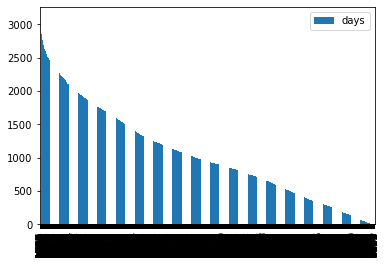

In [278]:
u_duration[['days']].plot.bar(y='days')

In [176]:
home_locs = home_locations[['userid', 'latitude', 'longitude', 'geometry']].set_index('userid')
swedish_home_locations = home_locs.loc[swedish_users]
swedish_home_locations

,latitude,longitude,geometry
userid,,,
5047,59.314920,18.019890,POINT (18.01989 59.31492)
5616,59.405498,17.954750,POINT (17.95475 59.40550)
8981,59.317410,18.026856,POINT (18.02686 59.31741)
32213,59.050000,17.300000,POINT (17.30000 59.05000)
392123,59.294972,17.933748,POINT (17.93375 59.29497)
...,...,...,...
789737143312740352,56.664820,12.877910,POINT (12.87791 56.66482)
790301765744951296,59.916667,16.600000,POINT (16.60000 59.91667)
794973407964229636,59.314261,18.076535,POINT (18.07653 59.31426)


In [179]:
swedish_homes_3006 = swedish_home_locations.to_crs("EPSG:3006")

In [190]:
swedish_homes_3006['x'] = swedish_homes_3006['geometry'].x
swedish_homes_3006['y'] = swedish_homes_3006['geometry'].y
swedish_homes_3006 = swedish_homes_3006[['x', 'y']]
swedish_homes_3006

,x,y
userid,,
5047,671874.615624,6.579016e+06
5616,667721.167858,6.588930e+06
8981,672258.276057,6.579311e+06
32213,631932.005759,6.547891e+06
392123,667071.796097,6.576577e+06
...,...,...
789737143312740352,369942.589986,6.282089e+06
790301765744951296,589462.856767,6.643212e+06
794973407964229636,675100.434592,6.579090e+06


In [191]:
swedish_homes_3006.to_csv('./../../dbs/sweden_home_locations.csv')